<a href="https://colab.research.google.com/github/VaibhavKumar2005/AI-ML-Journey-Repo/blob/main/ML6(SVC2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [24]:
iris = load_iris()
X=iris.data
y=iris.target

df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [26]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(X_test)

In [27]:
svm_model = SVC(kernel='linear', C=1.0, gamma='scale', random_state=42)

In [28]:
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [29]:
y_pred = svm_model.predict(X_test)

In [30]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



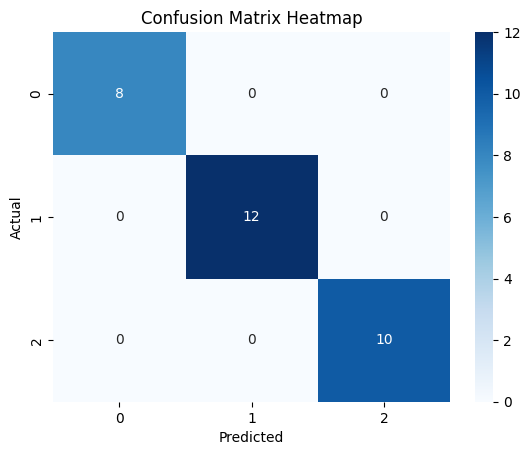

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

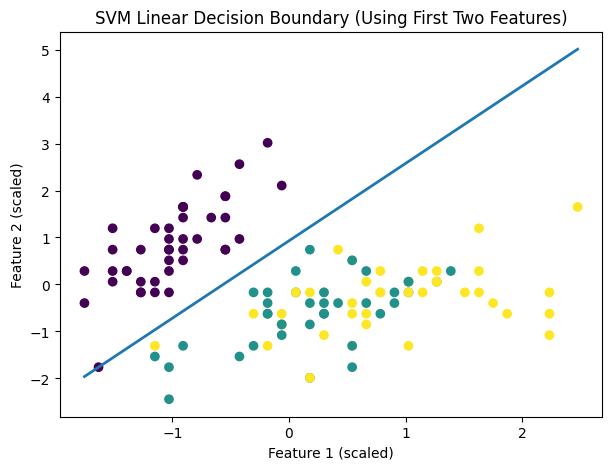

In [33]:
# ---- SVM LINEAR HYPERPLANE PLOT (2D PROJECTION) ----

# Use only first two features for visualization
X_vis = X_train[:, :2]
y_vis = y_train

# Train a new 2D SVM model on the reduced data
svm_2d = SVC(kernel='linear')
svm_2d.fit(X_vis, y_vis)

# Plot data
plt.figure(figsize=(7,5))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis)

# Extract hyperplane components
w = svm_2d.coef_[0]
b = svm_2d.intercept_[0]

# Create a line across plot range
x_vals = np.linspace(X_vis[:,0].min(), X_vis[:,0].max(), 100)
y_vals = -(w[0]/w[1]) * x_vals - b/w[1]

# Plot hyperplane
plt.plot(x_vals, y_vals, linewidth=2)

plt.title("SVM Linear Decision Boundary (Using First Two Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


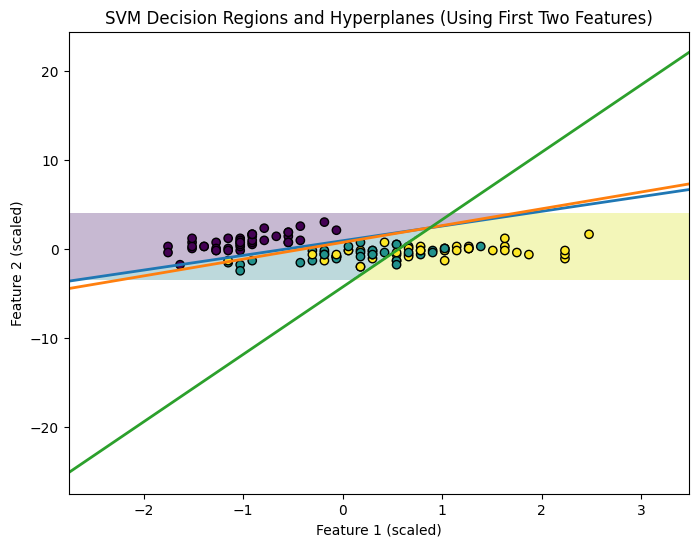

In [34]:
# ---- FULL CLASS DECISION REGIONS + ALL HYPERPLANES (2D PROJECTION) ----

# Use only first two features from your already scaled X_train
X_vis = X_train[:, :2]
y_vis = y_train

# Train a 2D SVM model
svm_2d = SVC(kernel='linear', decision_function_shape='ovr')
svm_2d.fit(X_vis, y_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict class for each grid point
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision regions
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3)

# Plot training points
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_vis, edgecolors='k')

# Plot each one-vs-rest hyperplane
w = svm_2d.coef_
b = svm_2d.intercept_

x_vals = np.linspace(x_min, x_max, 300)

for i in range(3):  # three classes
    # Only draw hyperplane if classifier exists
    if w[i,1] != 0:
        y_vals = -(w[i,0] / w[i,1]) * x_vals - b[i] / w[i,1]
        plt.plot(x_vals, y_vals, linewidth=2)

plt.title("SVM Decision Regions and Hyperplanes (Using First Two Features)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()


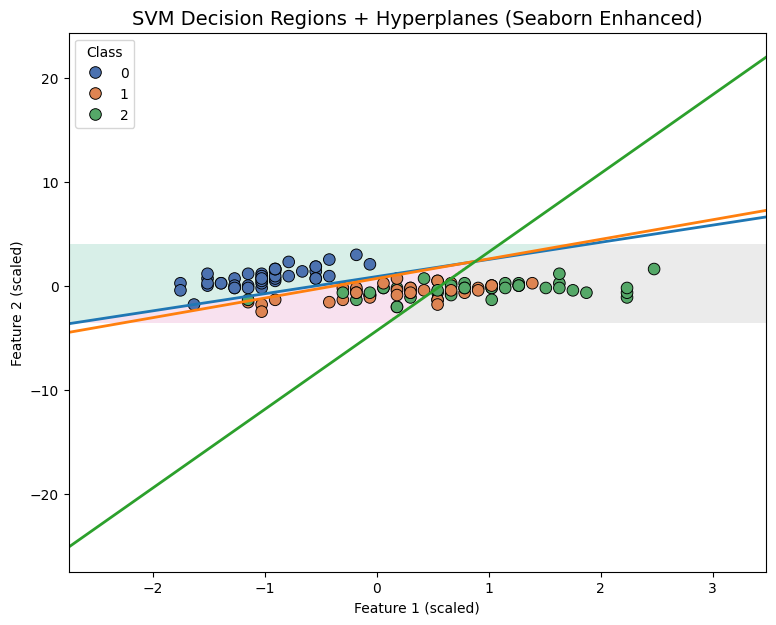

In [35]:
# ---- SVM DECISION REGIONS + HYPERPLANES (SEABORN VERSION) ----

# Use only first two features from already-scaled X_train
X_vis = X_train[:, :2]
y_vis = y_train

# Train a 2D SVM model
svm_2d = SVC(kernel='linear', decision_function_shape='ovr')
svm_2d.fit(X_vis, y_vis)

# Make a DataFrame for seaborn
df_vis = pd.DataFrame(X_vis, columns=["feature1", "feature2"])
df_vis["target"] = y_vis

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 300),
    np.linspace(y_min, y_max, 300)
)

# Predict each grid point
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(9, 7))

# --- Decision region background ---
plt.contourf(xx, yy, Z, alpha=0.25, cmap="Set2")

# --- Seaborn scatter plot ---
sns.scatterplot(
    data=df_vis,
    x="feature1",
    y="feature2",
    hue="target",
    palette="deep",
    edgecolor="black",
    s=70
)

# --- Plot each class hyperplane ---
w = svm_2d.coef_
b = svm_2d.intercept_
x_vals = np.linspace(x_min, x_max, 300)

for i in range(3):  # one-vs-rest hyperplanes
    if w[i,1] != 0:
        y_vals = -(w[i,0] / w[i,1]) * x_vals - b[i] / w[i,1]
        plt.plot(x_vals, y_vals, linewidth=2)

plt.title("SVM Decision Regions + Hyperplanes (Seaborn Enhanced)", fontsize=14)
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(title="Class")
plt.show()
